In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import winsorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib, pickle

In [3]:
dfm = pd.read_csv(r"C:\Users\hp\Desktop\Datasets\data_makino.csv")

In [4]:
dfm

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [5]:
dfm.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature(°C)', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [6]:
dfm.drop(['Date', 'Machine_ID', 'Assembly_Line_No'], axis=1)

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [9]:
dfm.dtypes

Date                                object
Machine_ID                          object
Assembly_Line_No                    object
Hydraulic_Pressure(bar)            float64
Coolant_Pressure(bar)              float64
Air_System_Pressure(bar)           float64
Coolant_Temperature(°C)            float64
Hydraulic_Oil_Temperature(°C)      float64
Spindle_Bearing_Temperature(°C)    float64
Spindle_Vibration(µm)              float64
Tool_Vibration(µm)                 float64
Spindle_Speed(RPM)                 float64
Voltage(volts)                     float64
Torque(Nm)                         float64
Cutting(kN)                        float64
Downtime                            object
dtype: object

In [7]:
dup = dfm.duplicated()
print(dup)
sum(dup)

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool


0

In [8]:
dfm.isna().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature(°C)            12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [10]:
num_feat = dfm.select_dtypes(exclude = ['object']).columns

In [11]:
num_feat

Index(['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature(°C)',
       'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
       'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'],
      dtype='object')

In [12]:
cat_feat = dfm.select_dtypes(include = ['object']).columns

In [13]:
cat_feat

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Downtime'], dtype='object')

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [15]:
num_pipeline = Pipeline(steps = [('imput', SimpleImputer(strategy = 'mean'))])
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, num_feat)])
imputation = preprocessor.fit(dfm)

joblib.dump(imputation, 'meanimpute_gradient')

cleandata = pd.DataFrame(imputation.transform(dfm), columns = num_feat)
cleandata

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
0,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.580000
1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.680000
2,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.550000
3,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.550000
4,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.550000
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.720000
2496,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.940000
2497,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,2.782551
2498,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.790000


In [16]:
dfm.isna().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature(°C)            12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [17]:
from feature_engine.outliers import Winsorizer

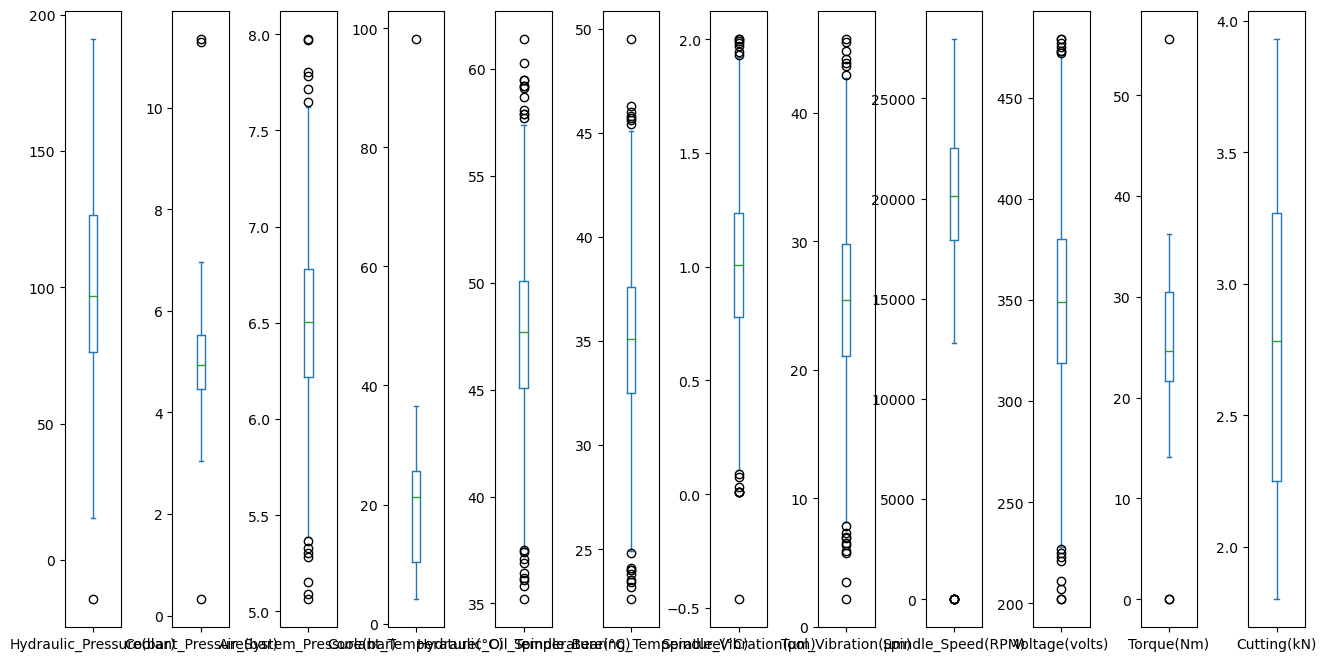

In [18]:
dfm.plot(kind = 'box', subplots = True, sharey = False, figsize = (16, 8))
plt.subplots_adjust(wspace =0.9)
plt.show()

In [20]:
winsor = Winsorizer(capping_method = 'iqr',
                       tail = 'both',
                       fold = 1.5,
                       variables = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)','Coolant_Temperature(°C)', 'Hydraulic_Oil_Temperature(°C)','Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)', 'Tool_Vibration(µm)','Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'])
                   
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

preprocessor1 = ColumnTransformer(transformers = [('wins', outlier_pipeline, num_feat)], remainder = 'passthrough')

print(preprocessor1)
                   
winz_data = preprocessor1.fit(cleandata)
                   
### Save the pipeline
joblib.dump(winz_data, 'winsor_gradient')

ColumnTransformer(remainder='passthrough',
                  transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Hydraulic_Pressure(bar)',
                                                                        'Coolant_Pressure(bar)',
                                                                        'Air_System_Pressure(bar)',
                                                                        'Coolant_Temperature(°C)',
                                                                        'Hydraulic_Oil_Temperature(°C)',
                                                                        'Spindle_Bearing_Temperature(°C)',
                     

['winsor_gradient']

In [21]:
cleandata1 = pd.DataFrame(winz_data.transform(cleandata), columns = cleandata.columns).convert_dtypes()

In [22]:
cleandata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Hydraulic_Pressure(bar)          2500 non-null   Float64
 1   Coolant_Pressure(bar)            2500 non-null   Float64
 2   Air_System_Pressure(bar)         2500 non-null   Float64
 3   Coolant_Temperature(°C)          2500 non-null   Float64
 4   Hydraulic_Oil_Temperature(°C)    2500 non-null   Float64
 5   Spindle_Bearing_Temperature(°C)  2500 non-null   Float64
 6   Spindle_Vibration(µm)            2500 non-null   Float64
 7   Tool_Vibration(µm)               2500 non-null   Float64
 8   Spindle_Speed(RPM)               2500 non-null   Float64
 9   Voltage(volts)                   2500 non-null   Float64
 10  Torque(Nm)                       2500 non-null   Float64
 11  Cutting(kN)                      2500 non-null   Float64
dtypes: Float64(12)
memor

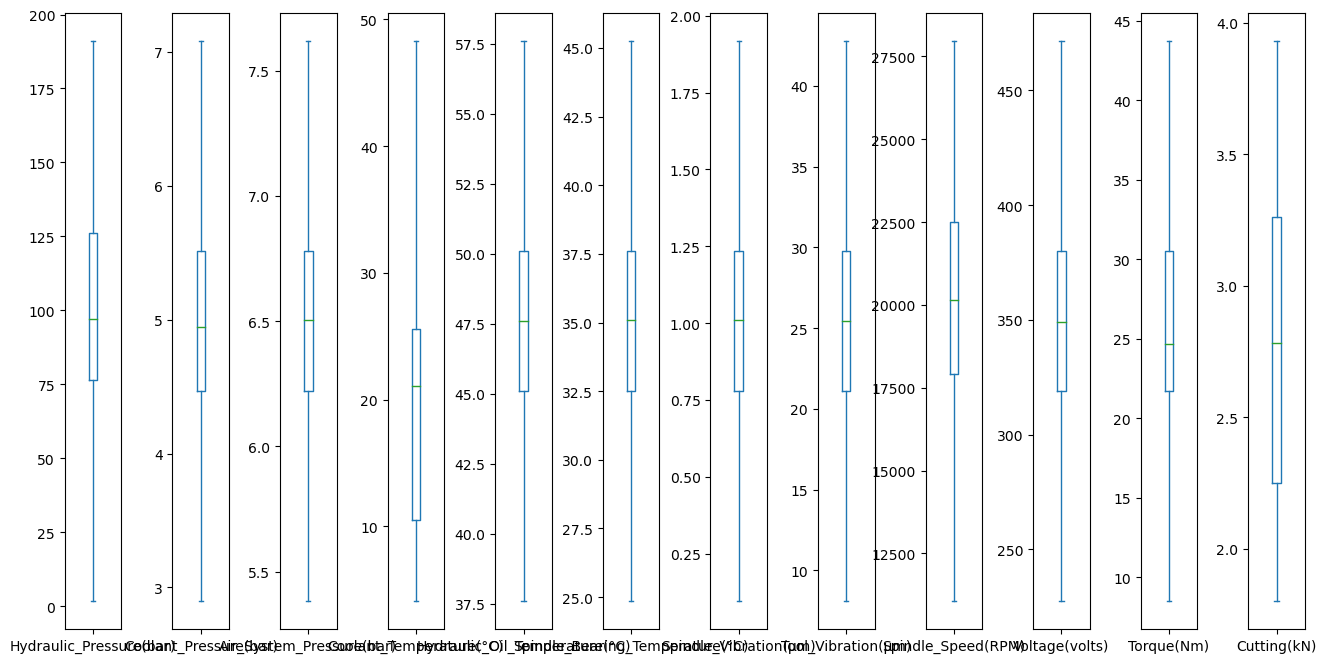

In [23]:
### Boxpplot 

cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (16,8))
plt.subplots_adjust(wspace=0.9)
plt.show()

### Create a scaling for MinMax Scaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scale_pipeline = Pipeline(steps = [('scale', MinMaxScaler())])
preprocessor2 = ColumnTransformer(transformers = [('num', scale_pipeline, num_feat)], remainder = 'passthrough')
print(preprocessor2)

scale = preprocessor2.fit(cleandata1)

## save the pipeline

joblib.dump(scale, 'minmax_gradient')

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature(°C)',
       'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
       'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'],
      dtype='object'))])


['minmax_gradient']

In [43]:
cleandata2 = pd.DataFrame(scale.transform(cleandata1))

In [44]:
cleandata2.columns

RangeIndex(start=0, stop=12, step=1)

In [45]:
cleandata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2500 non-null   float64
 1   1       2500 non-null   float64
 2   2       2500 non-null   float64
 3   3       2500 non-null   float64
 4   4       2500 non-null   float64
 5   5       2500 non-null   float64
 6   6       2500 non-null   float64
 7   7       2500 non-null   float64
 8   8       2500 non-null   float64
 9   9       2500 non-null   float64
 10  10      2500 non-null   float64
 11  11      2500 non-null   float64
dtypes: float64(12)
memory usage: 234.5 KB


In [46]:
cleandata2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.526696,0.489269,0.499747,0.326787,0.500766,0.500724,0.501684,0.499515,0.547107,0.498060,0.475256,0.461292
std,0.159587,0.233168,0.180258,0.190211,0.186238,0.183249,0.186849,0.184154,0.220626,0.185132,0.172258,0.289119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.394905,0.375000,0.375000,0.144272,0.375000,0.375000,0.375000,0.375000,0.405829,0.375000,0.375000,0.211268
50%,0.503288,0.489834,0.501423,0.384724,0.500916,0.502451,0.501556,0.499639,0.538005,0.497951,0.459256,0.460094
75%,0.658175,0.625000,0.625000,0.486563,0.625000,0.625000,0.625000,0.625000,0.676382,0.625000,0.625000,0.686620
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
dfm_cat = dfm.iloc[:, -1:]

In [32]:
dfm_cat

,Downtime
0,Machine_Failure
1,Machine_Failure
2,Machine_Failure
3,Machine_Failure
4,Machine_Failure
...,...
2495,No_Machine_Failure
2496,No_Machine_Failure
2497,No_Machine_Failure
2498,No_Machine_Failure


In [33]:
categ = ["Downtime"]

In [34]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
le

LabelEncoder()

In [48]:
dfm_cat = dfm_cat.apply(le.fit_transform)

In [49]:
dfm_norm = pd.concat([cleandata2, dfm_cat], axis=1)

In [50]:
dfm_norm

,0,1,2,3,4,5,6,7,8,9,10,11,Downtime
0,0.366213,0.964751,0.403931,0.486563,0.420,0.419118,0.656147,0.530549,0.877768,0.440574,0.441722,0.835681,0
1,0.653044,0.487404,0.364476,0.706082,0.490,0.477941,0.706092,0.495413,0.520484,0.575820,0.162140,0.413146,0
2,0.366635,0.942206,0.569603,0.203678,0.155,0.399510,0.671515,0.649282,0.520188,0.399590,0.441550,0.821596,0
3,0.727064,0.400745,0.527097,0.459406,0.330,0.772059,0.286773,0.654561,0.437911,0.543033,0.492934,0.821596,0
4,0.310579,0.955059,0.339660,0.000000,0.485,0.321078,0.487102,0.502394,0.915296,0.518443,0.483168,0.821596,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.586398,0.555293,0.364421,0.411881,0.560,0.605392,0.447036,0.351411,0.586661,0.223361,0.405011,0.431925,1
2496,0.535525,0.553142,0.757061,0.176521,0.535,0.325980,0.554610,0.767553,0.585300,0.375000,0.405720,0.535211,1
2497,0.617715,0.553406,0.513527,0.009052,0.615,0.556373,0.105653,0.251774,0.585714,0.440574,0.405504,0.461292,1
2498,0.761489,0.552160,0.456560,0.183310,0.345,0.355392,0.493688,0.530722,0.584353,0.608607,0.406214,0.464789,1


In [51]:
dfm_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,Downtime
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.526696,0.489269,0.499747,0.326787,0.500766,0.500724,0.501684,0.499515,0.547107,0.498060,0.475256,0.461292,0.494000
std,0.159587,0.233168,0.180258,0.190211,0.186238,0.183249,0.186849,0.184154,0.220626,0.185132,0.172258,0.289119,0.500064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.394905,0.375000,0.375000,0.144272,0.375000,0.375000,0.375000,0.375000,0.405829,0.375000,0.375000,0.211268,0.000000
50%,0.503288,0.489834,0.501423,0.384724,0.500916,0.502451,0.501556,0.499639,0.538005,0.497951,0.459256,0.460094,0.000000
75%,0.658175,0.625000,0.625000,0.486563,0.625000,0.625000,0.625000,0.625000,0.676382,0.625000,0.625000,0.686620,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Seperation 

In [54]:
# Input and Output Split
predictors = dfm_norm.loc[:, dfm_norm.columns!="Downtime"] # All row and all columns except sales column


# In[29]:


target = dfm_norm.iloc[:,-1:]
target

,Downtime
0,0
1,0
2,0
3,0
4,0
...,...
2495,1
2496,1
2497,1
2498,1


In [55]:
predictors

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.366213,0.964751,0.403931,0.486563,0.420,0.419118,0.656147,0.530549,0.877768,0.440574,0.441722,0.835681
1,0.653044,0.487404,0.364476,0.706082,0.490,0.477941,0.706092,0.495413,0.520484,0.575820,0.162140,0.413146
2,0.366635,0.942206,0.569603,0.203678,0.155,0.399510,0.671515,0.649282,0.520188,0.399590,0.441550,0.821596
3,0.727064,0.400745,0.527097,0.459406,0.330,0.772059,0.286773,0.654561,0.437911,0.543033,0.492934,0.821596
4,0.310579,0.955059,0.339660,0.000000,0.485,0.321078,0.487102,0.502394,0.915296,0.518443,0.483168,0.821596
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.586398,0.555293,0.364421,0.411881,0.560,0.605392,0.447036,0.351411,0.586661,0.223361,0.405011,0.431925
2496,0.535525,0.553142,0.757061,0.176521,0.535,0.325980,0.554610,0.767553,0.585300,0.375000,0.405720,0.535211
2497,0.617715,0.553406,0.513527,0.009052,0.615,0.556373,0.105653,0.251774,0.585714,0.440574,0.405504,0.461292
2498,0.761489,0.552160,0.456560,0.183310,0.345,0.355392,0.493688,0.530722,0.584353,0.608607,0.406214,0.464789


In [56]:
target

,Downtime
0,0
1,0
2,0
3,0
4,0
...,...
2495,1
2496,1
2497,1
2498,1


In [58]:
### Train Test Split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

### XG Boosting Classifier

In [60]:
from xgboost import XGBClassifier

In [61]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [62]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [63]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
confusion_matrix(y_test, xgb.predict(X_test))
accuracy_score(y_test, xgb.predict(X_test))

0.992

In [67]:
train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb.predict(X_test))

In [68]:
train_accuracy

1.0

In [69]:
test_accuracy

0.992

In [70]:
pickle.dump(xgb, open('xgb.pkl', 'wb'))